## Cargar paquetes

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

## Leer base de datos de CO2

In [2]:
url = 'https://raw.githubusercontent.com/Chefi/Modelos-de-Control-de-Producci-n/refs/heads/main/co2_dataset.csv'

In [3]:
df = pd.read_csv(url)
df

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454000,277.454000,277.454000
1,1,277.137000,277.137000,277.137000
2,2,277.160000,277.160000,277.160000
3,3,277.158000,277.158000,277.158000
4,4,277.157000,277.157000,277.157000
...,...,...,...,...
2010,2010,388.717029,390.784658,386.649401
2011,2011,390.944015,393.041154,388.846876
2012,2012,393.015993,395.036206,390.995779
2013,2013,395.724979,397.714917,393.735042


In [4]:
dfA = df[["data_mean_global"]][1950:]
dfA

,data_mean_global
1950,312.820971
1951,313.013971
1952,313.341970
1953,313.729969
1954,314.094969
...,...
2010,388.717029
2011,390.944015
2012,393.015993
2013,395.724979


Text(0, 0.5, 'ppm CO2')

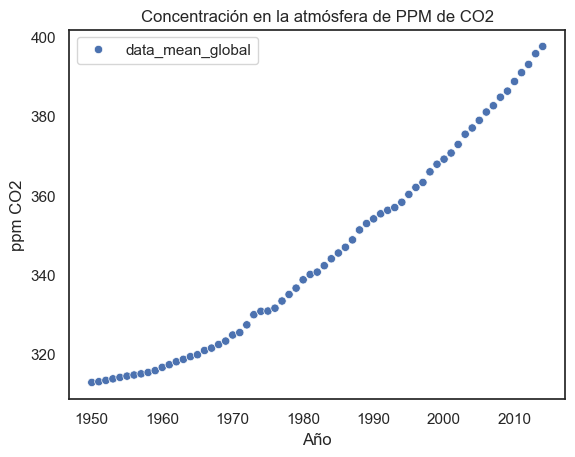

In [5]:
sns.set_style("white")
sns.scatterplot(dfA)
plt.title("Concentración en la atmósfera de PPM de CO2")
plt.xlabel("Año")
plt.ylabel("ppm CO2")

In [6]:
x = df["year"].values[1950:]
y = df["data_mean_global"].values[1950:]

In [7]:
x[:5]

array([1950, 1951, 1952, 1953, 1954], dtype=int64)

In [8]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [9]:
x[:5]

array([[1950],
       [1951],
       [1952],
       [1953],
       [1954]], dtype=int64)

### El método reshape(-1, 1) se utiliza para transformar una matriz unidimensional en una matriz bidimensional con una columna. El argumento -1 infiere automáticamente la cantidad de filas en función de la longitud de la matriz.

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(x,y)

LinearRegression()

In [12]:
reg.intercept_[0]

-2348.0338300545372

In [13]:
reg.coef_[0][0]

1.3588711929434647

In [14]:
reg.score(x,y) #R2

0.9705007348529174

In [15]:
SSR = np.sum((y-reg.predict(x))**2) # Suma cuadrado de los residuos
RMSE = np.sqrt(SSR/(len(x)-2)) # Root Mean Squarred Error (RMSE), estimado de la desviación estándar del error
y_mean = np.mean(y) 
SST = np.sum((y-y_mean)**2)
error = RMSE/y_mean
R2 = 1 - SSR/SST
SSR, RMSE, y_mean, error, R2

(1284.186006059877,
 4.514853802516011,
 345.24887435941014,
 0.013077099269021713,
 0.9705007348529174)

In [16]:
# calculate Mean Squarred Error (MSE)
mse = mean_squared_error(y, reg.predict(x))
print(f'Mean Squared Error: {mse}') # Out: Mean Squared Error

# calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, reg.predict(x))
print(f'Mean Absolute Error: {mae}') # Out: Mean Absolute Error

# calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}') # Out: Root Mean Squared Error

Mean Squared Error: 19.75670778553657
Mean Absolute Error: 3.769365763347331
Root Mean Squared Error: 4.4448518294243025


Text(0.5, 1.0, 'Año vs ppm CO2')

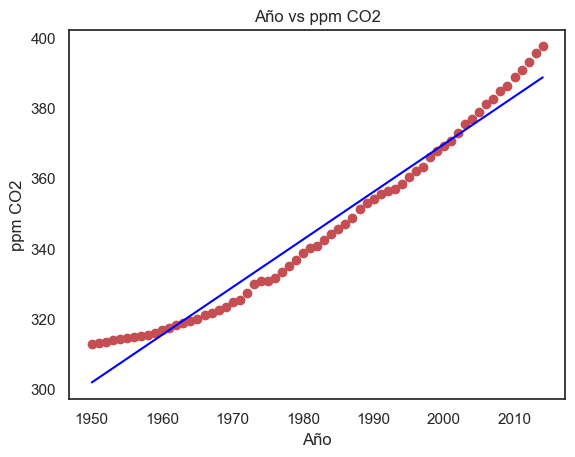

In [17]:
plt.plot(x,y, "ro")
plt.plot(x, reg.predict(x), color = "blue")
plt.xlabel("Año")
plt.ylabel("ppm CO2")
plt.title("Año vs ppm CO2")

In [18]:
import statsmodels.formula.api as smf

In [19]:
data = df[["year", "data_mean_global"]][1950:]

In [20]:
data

,year,data_mean_global
1950,1950,312.820971
1951,1951,313.013971
1952,1952,313.341970
1953,1953,313.729969
1954,1954,314.094969
...,...,...
2010,2010,388.717029
2011,2011,390.944015
2012,2012,393.015993
2013,2013,395.724979


In [21]:
lm = smf.ols(formula = "data_mean_global~year", data = data).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       data_mean_global   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.40e-50
Time:                        10:38:19   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2348.0338     59.161    -39.689      0.000   -2466.259   -2229.809
year           1.3589      0.030     45.526      0.000       1.299       1.419
==============================================================================
Omnibus:                        7.614   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.820
Skew:                           0.812   Prob(JB):                       0.0200
Kurtosis:                       2.497   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
Year = range(2015,2041)
Year

range(2015, 2041)

In [24]:
data_n = pd.DataFrame(Year)
data_n.columns=["year"]
#data_n.year = pd.to_datetime(data_n.year)
#data_n.set_index("year")
data_n

,year
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021
7,2022
8,2023
9,2024


In [25]:
P = lm.predict(pd.DataFrame(data_n))
P

0     390.091624
1     391.450495
2     392.809366
3     394.168237
4     395.527108
5     396.885980
6     398.244851
7     399.603722
8     400.962593
9     402.321464
10    403.680336
11    405.039207
12    406.398078
13    407.756949
14    409.115820
15    410.474692
16    411.833563
17    413.192434
18    414.551305
19    415.910176
20    417.269048
21    418.627919
22    419.986790
23    421.345661
24    422.704532
25    424.063404
dtype: float64

In [26]:
dataR = {'year': Year, 'Pronósticos': P.values}

In [27]:
dataR

{'year': range(2015, 2041),
 'Pronósticos': array([390.09162373, 391.45049492, 392.80936611, 394.16823731,
        395.5271085 , 396.88597969, 398.24485088, 399.60372208,
        400.96259327, 402.32146446, 403.68033566, 405.03920685,
        406.39807804, 407.75694923, 409.11582043, 410.47469162,
        411.83356281, 413.19243401, 414.5513052 , 415.91017639,
        417.26904759, 418.62791878, 419.98678997, 421.34566116,
        422.70453236, 424.06340355])}

In [28]:
Prediccion = pd.DataFrame(dataR)
Prediccion

,year,Pronósticos
0,2015,390.091624
1,2016,391.450495
2,2017,392.809366
3,2018,394.168237
4,2019,395.527108
5,2020,396.885980
6,2021,398.244851
7,2022,399.603722
8,2023,400.962593
9,2024,402.321464


In [29]:
Prediccion = Prediccion.set_index("year")

In [30]:
Prediccion

,Pronósticos
year,
2015,390.091624
2016,391.450495
2017,392.809366
2018,394.168237
2019,395.527108
2020,396.885980
2021,398.244851
2022,399.603722
2023,400.962593


In [31]:
dfA["Ajustados"] = lm.fittedvalues

In [32]:
dfA

,data_mean_global,Ajustados
1950,312.820971,301.764996
1951,313.013971,303.123867
1952,313.341970,304.482739
1953,313.729969,305.841610
1954,314.094969,307.200481
...,...,...
2010,388.717029,383.297268
2011,390.944015,384.656139
2012,393.015993,386.015010
2013,395.724979,387.373881


In [33]:
dfA.index.name = "year"

In [34]:
dfA

,data_mean_global,Ajustados
year,,
1950,312.820971,301.764996
1951,313.013971,303.123867
1952,313.341970,304.482739
1953,313.729969,305.841610
1954,314.094969,307.200481
...,...,...
2010,388.717029,383.297268
2011,390.944015,384.656139
2012,393.015993,386.015010


In [35]:
MM = pd.concat([dfA, Prediccion], axis =1)
MM

,data_mean_global,Ajustados,Pronósticos
year,,,
1950,312.820971,301.764996,NaN
1951,313.013971,303.123867,NaN
1952,313.341970,304.482739,NaN
1953,313.729969,305.841610,NaN
1954,314.094969,307.200481,NaN
...,...,...,...
2036,NaN,NaN,418.627919
2037,NaN,NaN,419.986790
2038,NaN,NaN,421.345661


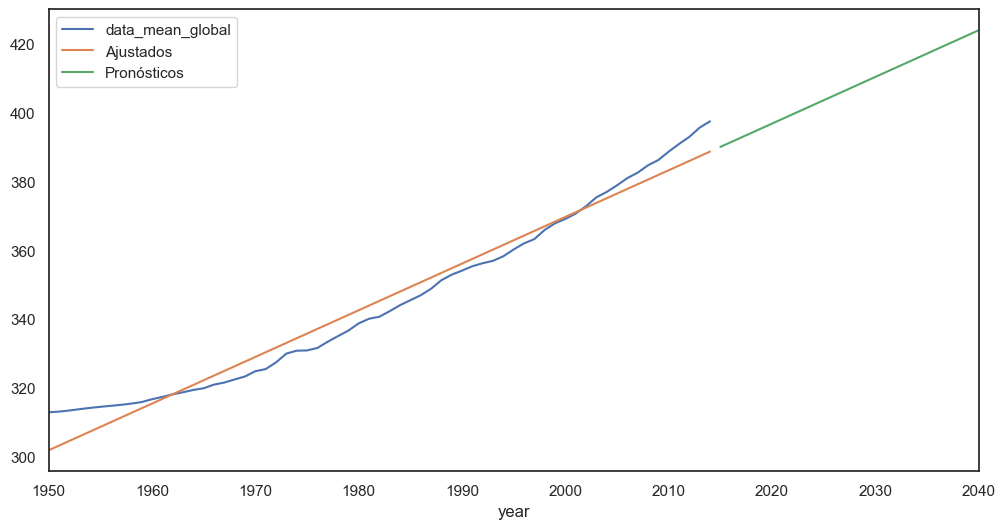

In [36]:
MM.iloc[:].plot( figsize=(12,6)).autoscale(axis='x',tight=True);

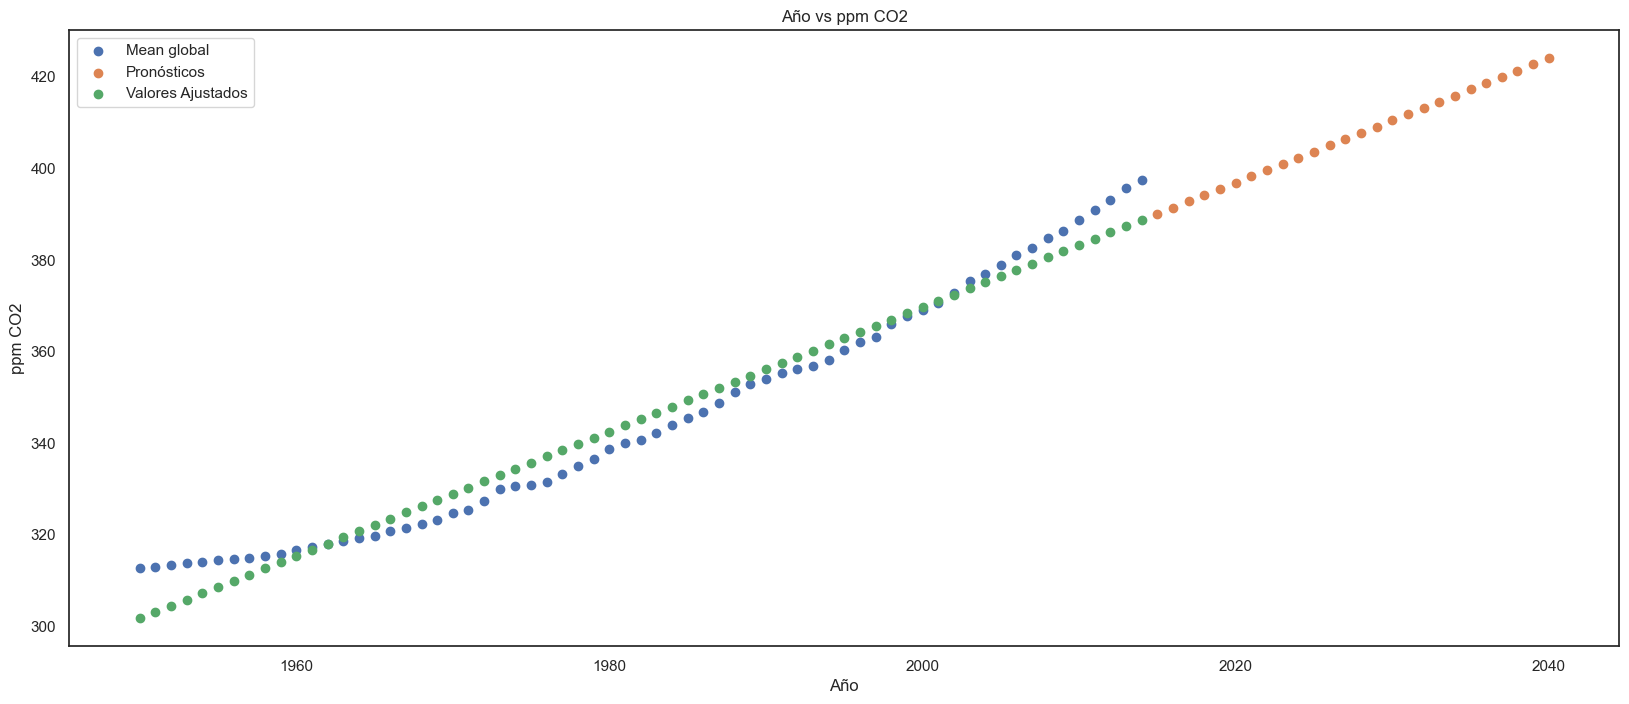

In [37]:
plt.figure(figsize=(20, 8))
plt.scatter(MM.index.values, MM['data_mean_global'].values)
plt.scatter(MM.index.values, MM['Pronósticos'].values)
plt.scatter(MM.index.values, MM['Ajustados'].values)
plt.legend(["Mean global" , "Pronósticos", "Valores Ajustados"])
plt.xlabel("Año")
plt.ylabel("ppm CO2")
plt.title("Año vs ppm CO2")
plt.show()